In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [165]:
df = pd.read_csv('2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [4]:
df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

# Central Tendency (Titik Pusat Data)

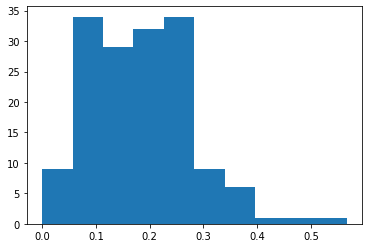

mean: 0.18484615384615383
median: 0.1775
mode: 0    0.153
dtype: float64


<Figure size 432x288 with 0 Axes>

In [226]:
plt.hist(df['Generosity'])
plt.show()
print('mean:', df['Generosity'].mean())
print('median:', df['Generosity'].median())
print('mode:', df['Generosity'].mode())
plt.savefig('Happy1.png')
plt.show()

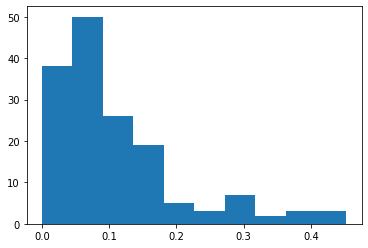

mean: 0.11060256410256411
median: 0.08549999999999999
mode: 0    0.028
1    0.078
2    0.089
dtype: float64


<Figure size 432x288 with 0 Axes>

In [227]:
plt.hist(df['Perceptions of corruption'])
plt.show()
print('mean:', df['Perceptions of corruption'].mean())
print('median:', df['Perceptions of corruption'].median())
print('mode:', df['Perceptions of corruption'].mode())
plt.savefig('Happy2.png')
plt.show()

# Dispersion (Persebaran Data)

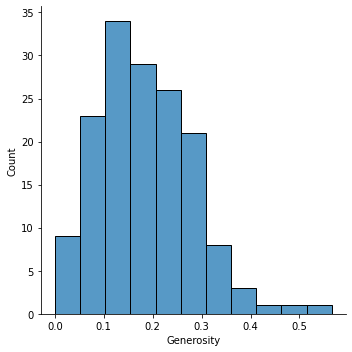

In [216]:
sns.displot(df['Generosity'])
df['Generosity'].std()
plt.savefig('Happy3.png')

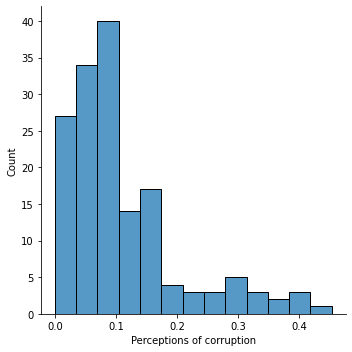

In [217]:
sns.displot(df['Perceptions of corruption'])
df['Perceptions of corruption'].std()
plt.savefig('Happy4.png')

# Distribution (Distribusi Data)

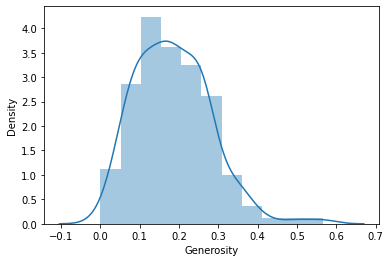

In [218]:
from scipy.stats import stats
sns.distplot(df['Generosity'])
stats.skew(df['Generosity'])
plt.savefig('Happy5.png')

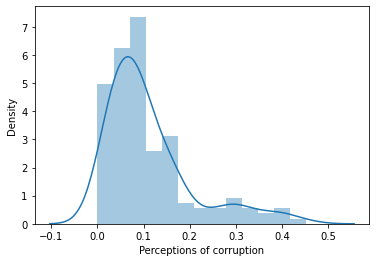

In [219]:
sns.distplot(df['Perceptions of corruption'])
stats.skew(df['Perceptions of corruption'])
plt.savefig('Happy6.png')

# Outliers

In [18]:
def find_outliers(x):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    lower_whisker = np.percentile(x, 25) - (1.5 * iqr)
    upper_whisker = np.percentile(x, 75) + (1.5 * iqr)
    lower_outliers = []
    upper_outliers = []
    for i in x:
        if i < lower_whisker:
            lower_outliers.append(i)
        elif i > upper_whisker:
            upper_outliers.append(i)
    print('Q1 :', np.percentile(x, 25), '\n' 
    'Q2 :', np.percentile(x, 50), '\n'
    'Q3 :', np.percentile(x, 75), '\n'
    'IQR :', iqr, '\n'
    'Lower Outliers :', len(lower_outliers), '\n' 
    'Upper Outliers :', len(upper_outliers))

Q1 : 1.05575 
Q2 : 1.2715 
Q3 : 1.4525 
IQR : 0.39674999999999994 
Lower Outliers : 4 
Upper Outliers : 0


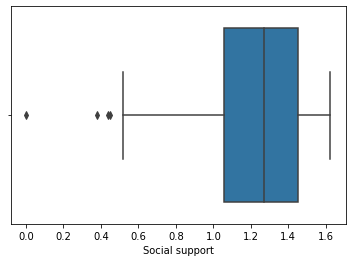

In [220]:
sns.boxplot(df['Social support'])
find_outliers(df['Social support'])
plt.savefig('Happy7.png')

kolom Social support memiliki lower outliers sebanyak 4

In [35]:
df['Freedom to make life choices'].value_counts()

0.498    3
0.557    3
0.508    3
0.555    2
0.470    2
        ..
0.245    1
0.532    1
0.311    1
0.401    1
0.000    1
Name: Freedom to make life choices, Length: 130, dtype: int64

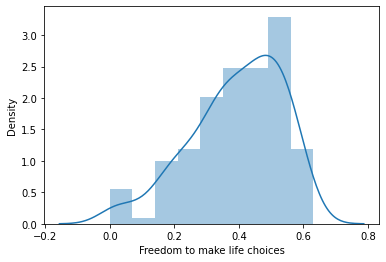

In [221]:
sns.distplot(df['Freedom to make life choices'])
plt.savefig('Happy8.png')

kolom Freedom to make life choices memiliki persebaran data terbanyak di 0.3 sampai 0.5+ dan memiliki positive tail / memiliki lower outliers

In [45]:
df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy']].corr(method= 'spearman')

,Score,GDP per capita,Social support,Healthy life expectancy
Score,1.000000,0.814483,0.816181,0.807275
GDP per capita,0.814483,1.000000,0.768539,0.851513
Social support,0.816181,0.768539,1.000000,0.725997
Healthy life expectancy,0.807275,0.851513,0.725997,1.000000


method korelasi spearman karena distribusi data tidak normal,

Social support memiliki korelasi tertinggi terhadap kolom score, 
pemerintah mungkin sebaiknya lebih focus dalam meningkatkan Social support untuk bisa mendapatkan hasil yang lebih baik lagi.

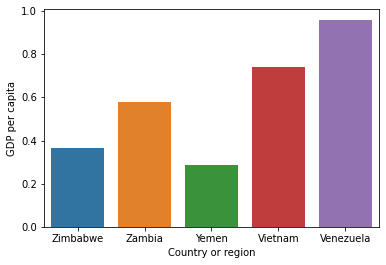

In [223]:
sns.barplot(df[['Country or region', 'GDP per capita']]['Country or region'].sort_values(ascending= False).head(), df['GDP per capita'])
plt.savefig('Happy9.png')

Zimbabwe, Zambia, Yemen, Vietnam dan Venezuela merupakan 5 negara yang memiliki GDP per capita tertinggi

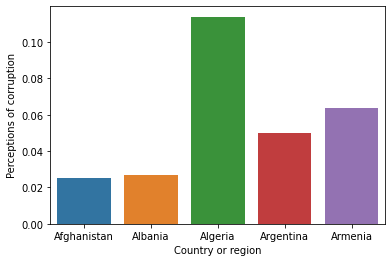

In [224]:
sns.barplot(df[['Country or region', 'Perceptions of corruption']]['Country or region'].sort_values(ascending= True).head(), df['Perceptions of corruption'])
plt.savefig('Happy10.png')

Afghanistan, Albania, Algeria, Argentina dan Armenia merupakan 5 negara yang memiliki Perceptions of corruption terendah

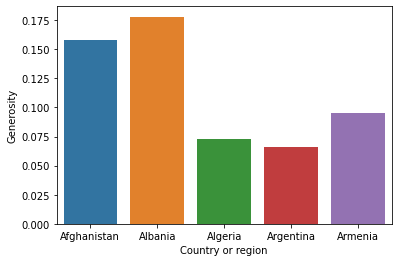

In [225]:
sns.barplot(df[['Country or region', 'Generosity']]['Country or region'].sort_values(ascending= True).head(), df['Generosity'])
plt.savefig('Happy11.png')

Afghanistan, Albania, Algeria, Argentina dan Armenia merupakan 5 negara yang memiliki Generosity terendah

# Uji Hipotesis untuk menguji apakah ada perbedaan Score antara negara yang GDP per capita nya di atas rata-rata dengan yang di bawah rata-rata

In [210]:
df[(df['GDP per capita'] > df['GDP per capita'].mean())]['Score'].head()

0    7.769
1    7.600
2    7.554
3    7.494
4    7.488
Name: Score, dtype: float64

In [211]:
df[(df['GDP per capita'] < df['GDP per capita'].mean())]['Score'].head()

26    6.436
34    6.253
40    6.174
44    6.105
45    6.100
Name: Score, dtype: float64

In [212]:
from scipy.stats import stats
print(stats.normaltest(df['GDP per capita']))
print(stats.normaltest(df['Score']))

NormaltestResult(statistic=13.373406593366198, pvalue=0.0012473882709888927)
NormaltestResult(statistic=4.465227462648073, pvalue=0.10724774668508107)


In [213]:
df[['GDP per capita', 'Score']].corr(method= 'spearman')

,GDP per capita,Score
GDP per capita,1.000000,0.814483
Score,0.814483,1.000000


# Terdapat perbedaan Score antara negara yang GDP per capitanya di atas rata-rata dengan yang di bawah rata-rata, tetapi tidak begitu signifikan sekali.